# EDA - Ejemplo - Iris

**Contexto**  
Este conjunto de datos es muy famoso y busca identificar la especie de iris, de acuerdo a las características proporcionadas.

**Contenido**  
El conjunto de datos proviene de Seaborn.  
Contiene 150 renglones con las siguientes columnas:  

| Variable     | Definición                      | Valor                         |
| ------------ | ------------------------------- | ----------------------------- |
| sepal_length | Longitud del sépalo             | Centímetros                   |
| sepal_width  | Ancho de sépalo                 | Centímetros                   |
| petal_length | Longitud del pétalo             | Centímetros                   |
| petal_width  | Ancho del pétalo                | Centímetros                   |
| species      | Especie **(variable objetivo)** | setosa, versicolor, virginica |

La variable objetivo se proporciona en un conjunto por separado

**Planteamiento del problema**  
Se busca predecir la especie de iris, de acuerdo a los datos de los sépalos y pétalos.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

### Iris Setosa
<img src='http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg' style='width:300px' />

### Iris Versicolor
<img src='http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg' style='width:300px' />

### Iris Virginica
<img src='http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg' style='width:300px' />

## Cargar Datos

In [2]:
# Importar los datos
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Renombrar columnas
df.columns = ['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'especie']

In [4]:
print(df['especie'].unique())

['setosa' 'versicolor' 'virginica']


In [5]:
# Transformar target a numérico
df.replace('setosa',     '0', inplace=True)
df.replace('versicolor', '1', inplace=True)
df.replace('virginica',  '2', inplace=True)
df = df.astype({'especie':'int'})
df.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## EDA

In [6]:
# Revisar los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitud_sepalo  150 non-null    float64
 1   ancho_sepalo     150 non-null    float64
 2   longitud_petalo  150 non-null    float64
 3   ancho_petalo     150 non-null    float64
 4   especie          150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.describe()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,especie
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


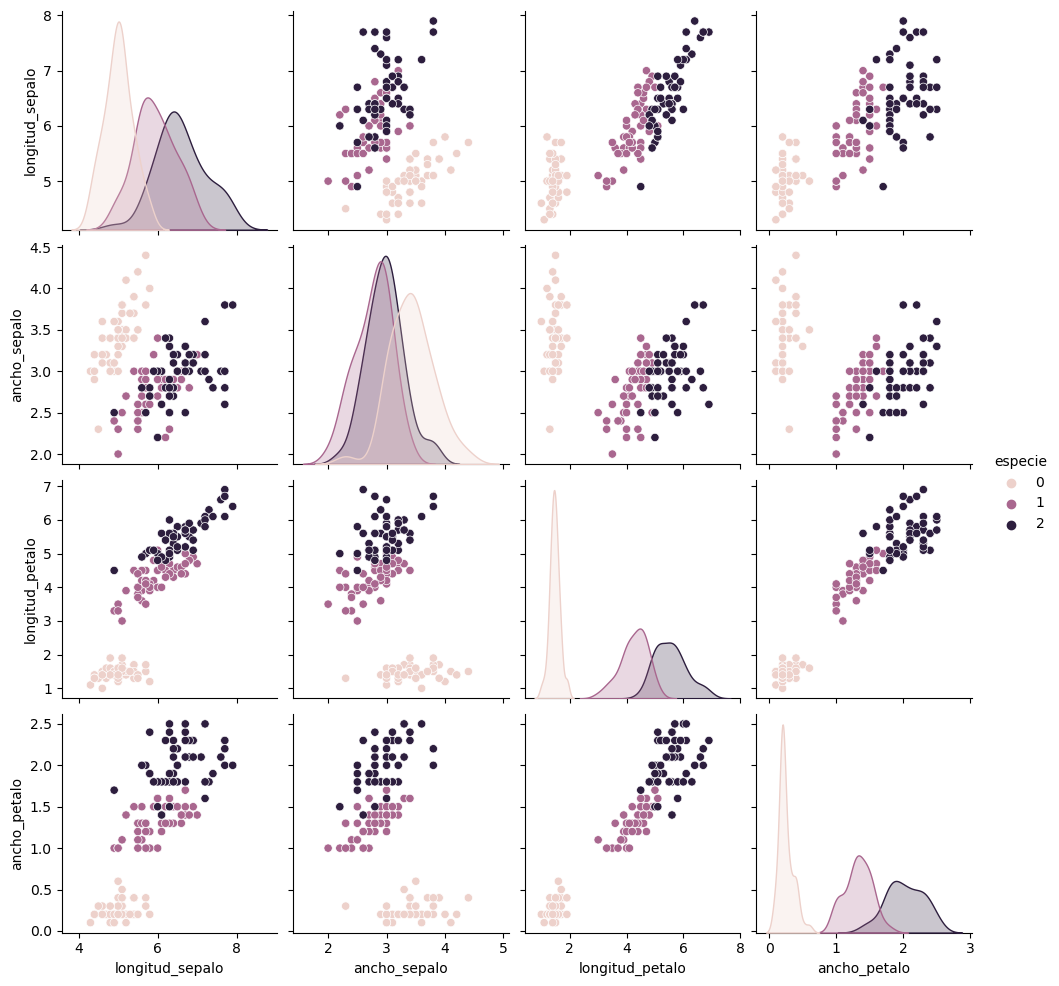

In [8]:
# Revisar las relaciones entre los datos
sns.pairplot(df, hue='especie')

<Axes: >

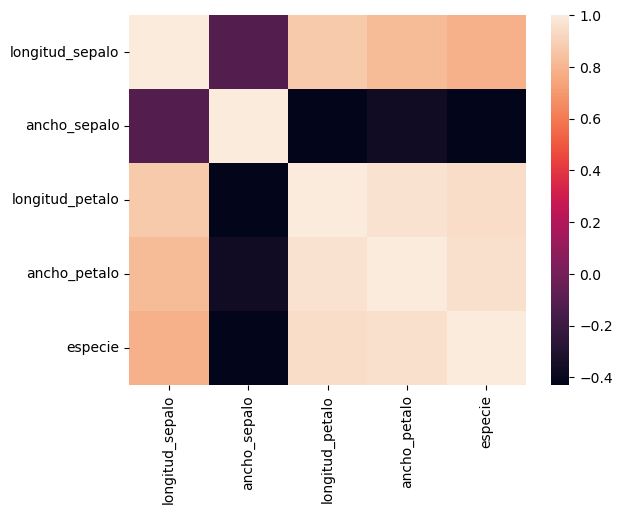

In [9]:
sns.heatmap(df.corr())

## Normalizacion

In [10]:
# Variables independientes
X = df[['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo']]
X.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# Normalizar
scaler = StandardScaler()
X_adj = scaler.fit_transform(X)
print(X_adj)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [12]:
# Variable dependiente
y = df['especie']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: especie, dtype: int32

In [13]:
print('X:', len(X_adj), 'y:', len(y))

X: 150 y: 150
